In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rc('axes', unicode_minus=False)
#建立Features
datasets=pd.read_table("PEER_Dataset.txt",sep='\s+')
datasets=pd.DataFrame(datasets)
feature=datasets.iloc[:,0:13]
feature

,Concrete_Strength(MPa),Transversel_y_(MPa),Longitudinal_C_y_(MPa),Longitudinal_I_y_(MPa),Width_(mm),Depth_(mm),Length_Inflection_(mm),Length_Measured_(mm),Axial_Load_(kN),Longitudinal_reinforcement_Ratio,Transverse_reinforcement_Ratio,Span-to-depth_Ratio,Axial_Load_Ratio
0,23.1,297.0,375.0,375.0,550.0,550.0,1200.0,1200.0,1815,0.0179,0.015,2.18,0.260
1,41.4,316.0,375.0,375.0,550.0,550.0,1200.0,1200.0,2680,0.0179,0.023,2.18,0.214
2,21.4,297.0,375.0,375.0,550.0,550.0,1200.0,1200.0,2719,0.0179,0.020,2.18,0.420
3,23.5,294.0,375.0,375.0,550.0,550.0,1200.0,1200.0,4265,0.0179,0.035,2.18,0.600
4,23.6,320.0,427.0,427.0,400.0,600.0,1600.0,1600.0,1435,0.0151,0.028,4.00,0.380
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,35.7,368.0,363.0,363.0,400.0,400.0,1245.0,1245.0,157,0.0158,0.000,3.11,0.027
246,34.3,368.0,363.0,363.0,400.0,400.0,1245.0,1245.0,157,0.0158,0.000,3.11,0.029
247,33.2,368.0,363.0,363.0,400.0,400.0,1245.0,1245.0,157,0.0158,0.000,3.11,0.030
248,36.8,368.0,363.0,363.0,400.0,400.0,1245.0,1245.0,157,0.0158,0.000,3.11,0.027


In [2]:
feature=pd.DataFrame(feature)
feature_names=datasets.keys()
#特征归一化
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler(feature_range=(-1,1))
# feature=scaler.fit_transform(feature)
# feature=pd.DataFrame(feature)
# print(feature_names)

In [3]:
#建立Targets
target=[]
labels=["Flexure","Flexure-Shear","Shear"]
for i in datasets.iloc[:,13]:
    if i=="Flexure":
        target.append(0)
    if i == "Flexure-Shear":
        target.append(1)
    if i=="Shear":
        target.append(2)

#样本划分
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(feature,target,random_state=666,test_size=0.3)

[Text(0, 0.5, 'Concrete_Strength(MPa)'),
 Text(0, 1.5, 'Transversel_y_(MPa)'),
 Text(0, 2.5, 'Longitudinal_C_y_(MPa)'),
 Text(0, 3.5, 'Longitudinal_I_y_(MPa)'),
 Text(0, 4.5, 'Width_(mm)'),
 Text(0, 5.5, 'Depth_(mm)'),
 Text(0, 6.5, 'Length_Inflection_(mm)'),
 Text(0, 7.5, 'Length_Measured_(mm)'),
 Text(0, 8.5, 'Axial_Load_(kN)'),
 Text(0, 9.5, 'Longitudinal_reinforcement_Ratio'),
 Text(0, 10.5, 'Transverse_reinforcement_Ratio'),
 Text(0, 11.5, 'Span-to-depth_Ratio'),
 Text(0, 12.5, 'Axial_Load_Ratio')]

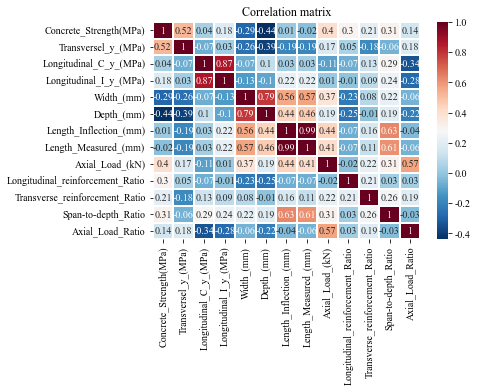

In [4]:
corr=feature.corr()
corr=corr.to_numpy()
corr=np.around(corr,2)
import seaborn as sns
fig, ax= plt.subplots()
h = sns.heatmap(corr,cmap='RdBu_r', linewidths=.05, annot = True)
h.set_title("Correlation matrix")
h.set_xticklabels(feature_names[:-1],rotation=90)
h.set_yticklabels(feature_names[:-1],rotation=0)

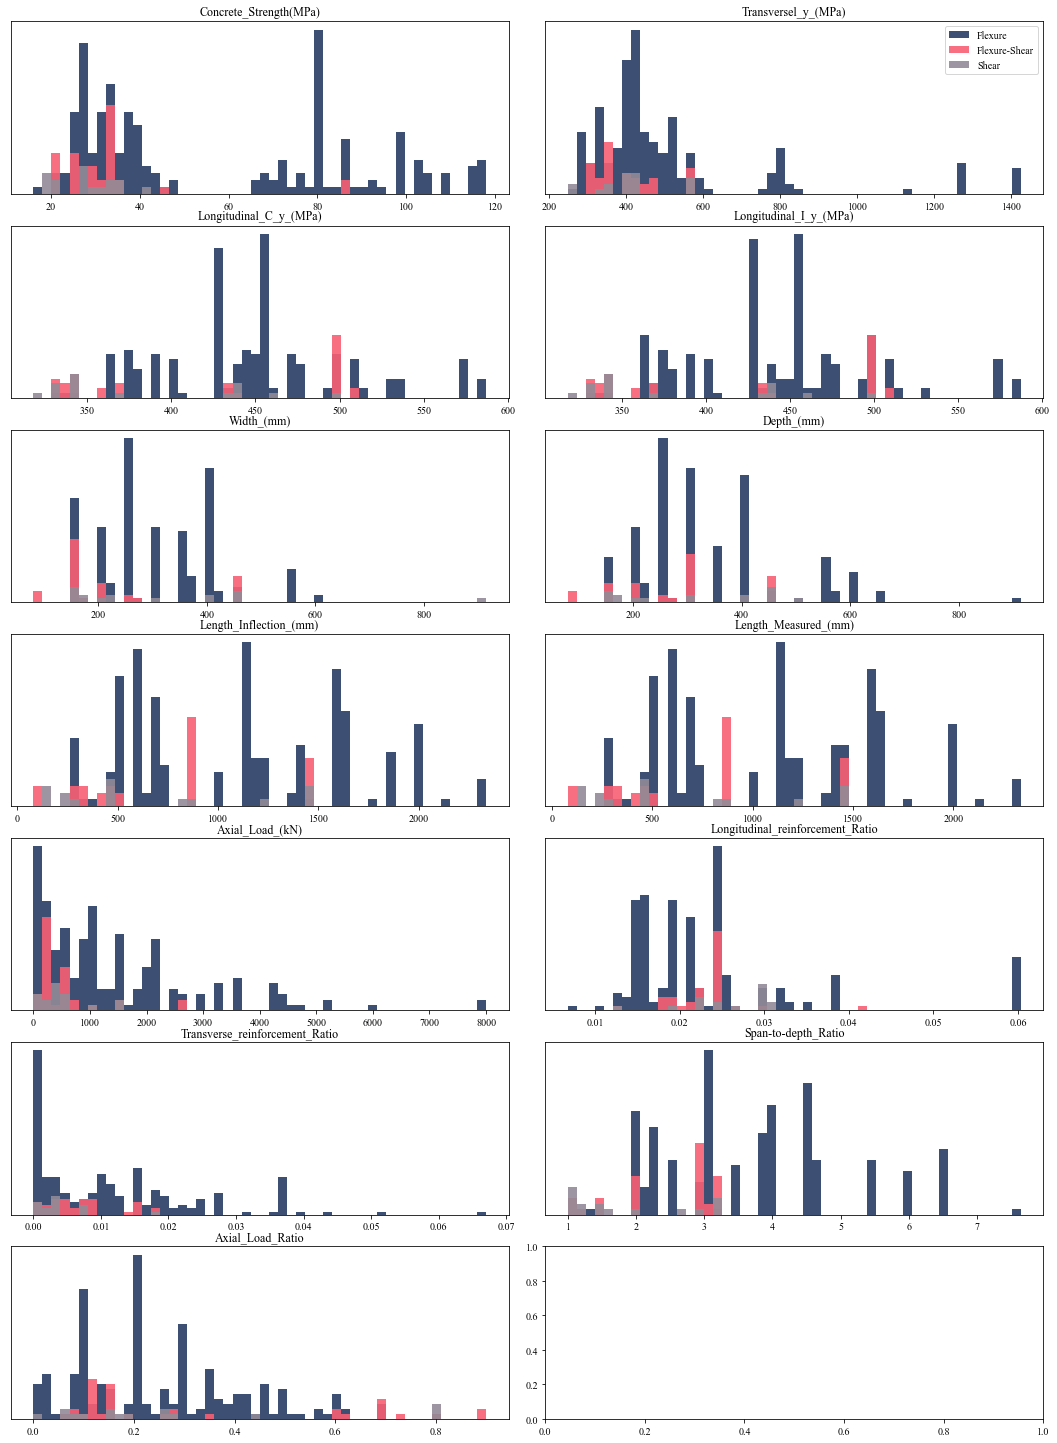

In [5]:
fig,axes=plt.subplots(7,2,figsize=(15,20))
ax=axes.ravel()
fig.tight_layout()
Flexure=datasets[datasets.iloc[:,13]=='Flexure'].iloc[:,0:13].to_numpy()
Flexure_Shear=datasets[datasets.iloc[:,13]=='Flexure-Shear'].iloc[:,0:13].to_numpy()
Shear=datasets[datasets.iloc[:,13]=='Shear'].iloc[:,0:13].to_numpy()
feature=feature.to_numpy()

for i in range(13):
    _,bins=np.histogram(feature[:,i],bins=50)
    ax[i].hist(Flexure[:,i],bins=bins,color="#283c63",alpha=0.9)
    ax[i].hist(Flexure_Shear[:, i], bins=bins, color="#f85f73", alpha=0.9)
    ax[i].hist(Shear[:, i], bins=bins, color="#928a97", alpha=0.9)
    ax[i].set_title(feature_names[i])
    ax[i].set_yticks(())
ax[1].legend(['Flexure','Flexure-Shear','Shear'],loc='best')

Text(0, 0.5, 'Feature')

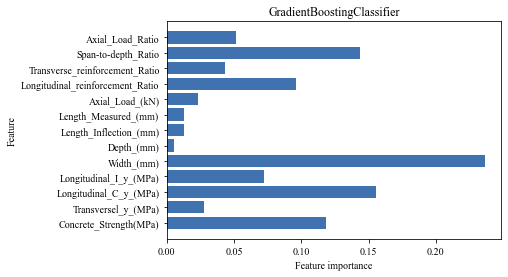

In [11]:
#GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=500,max_depth=5)
gbc.fit(X_train,y_train)
y_pred=gbc.predict(X_test)
fig,ax = plt.subplots()
n_features=feature.shape[1]
ax.set_title("GradientBoostingClassifier")
ax.barh(range(n_features),gbc.feature_importances_,align='center',color='#3f72af')
ax.set_yticks(np.arange(13),feature_names[:-1])
ax.set_xlabel("Feature importance")
ax.set_ylabel("Feature")